# Calculations of MR in Rhombohedral graphene

## Load packages

In [1]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
# add https://github.com/fernandopenaranda/Optics_in_the_length_gauge
# units meV, fs, K

proj_folder = dirname(pwd())
rhomb_folder = proj_folder * "/model/rhombohedral/"
common_folder = proj_folder * "/comfunctions/"
figures_folder = proj_folder * "/Paper/Figures/"

include(rhomb_folder * "model.jl")
include(rhomb_folder * "observables.jl")
include(rhomb_folder * "plotters.jl")
include(rhomb_folder * "filling.jl")
include(rhomb_folder * "wrapper_lmc.jl")
include(rhomb_folder * "spontaneous_sym_breakingmodels.jl")
include(rhomb_folder * "local_hartree_optimization.jl")
include(common_folder * "separate_contributions.jl")

plotmap! (generic function with 1 method)

In [3]:
# using GLMakie

## Calculations

### Presets

In [2]:
μlist = collect(0:0.1:10)
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 2, 0)
T = 2
B = 10
evals = 10000
N = 7
T = 2 #evals 80000 not perfect
τ = 200

200

### Bands

In [63]:
# using CairoMakie
# CairoMakie.disable_mime!("svg", "pdf", "text/html")

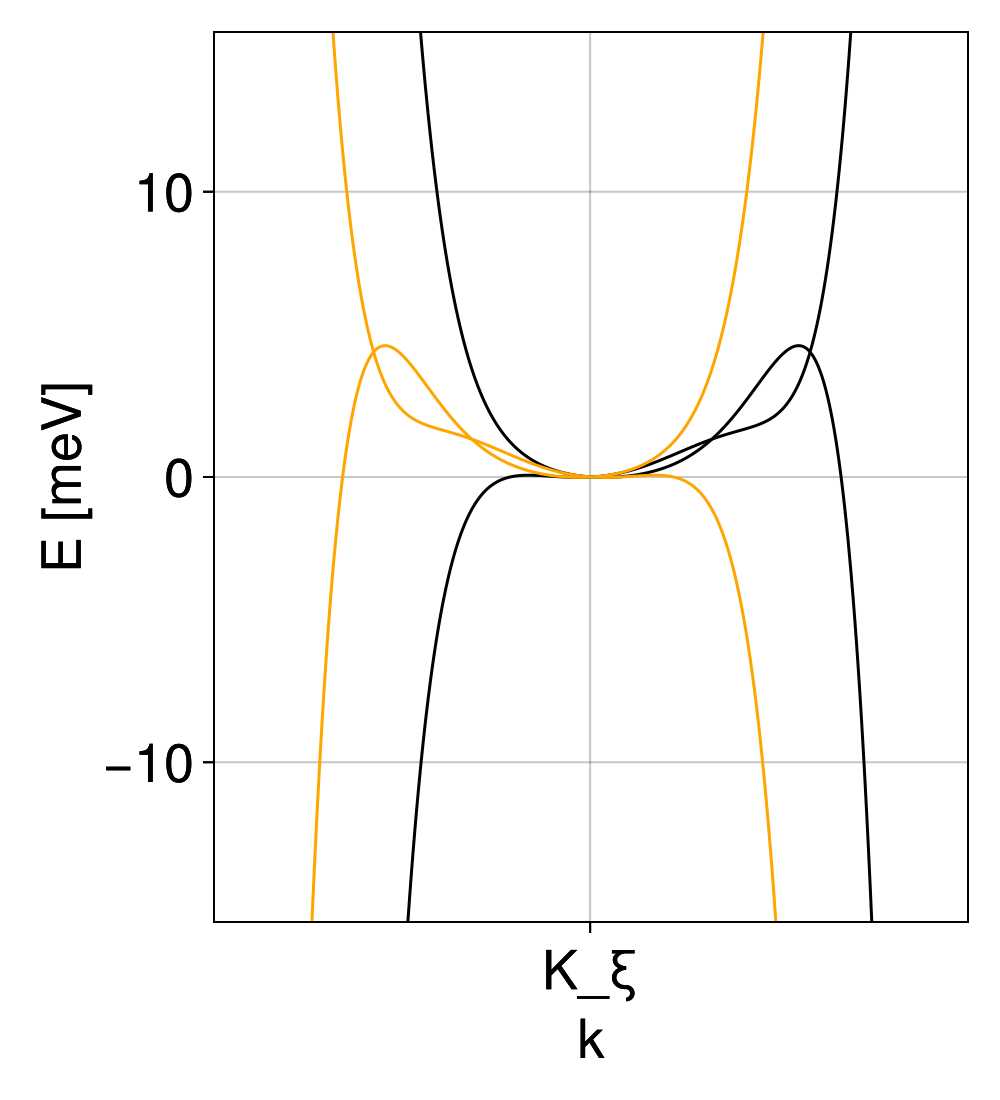

In [69]:
 # number of layers
fig = abcNplotbandsk(N,200, Params_rhombohedral(p, ξ =1), ylims = [-5,5])
abcNplotbandsk(fig, N, 200, Params_rhombohedral(p, ξ =-1), ylims = [-5,5])

In [65]:
# using BZpaths
# Rs = ([√3/2,1/2,], [0,1.0])                 # Lattice vectors, can be 2d or 3d
# high_sym_line = [:Γ, :M, :X, :Γ]            # Custom k-path over high symmetry momenta
# sgnum = 17                                 # point group (17 = 2d triangular lattice)
# N = 100                            # points in the k-mesh
# plot_kpath(Rs, sgnum, N)

In [74]:
kc = 1/(cnst* a0) #with dimensions

1.1595324126862936

In [75]:
BZ_area = 8π^2/√3/a0^2

7.532842564299104

In [85]:
cnst = p.γ1/(p.γ0 *√3/2)
Δx = [-cnst, cnst] 
Δy = [-cnst, cnst]
A_small = ((Δx[2]-Δx[1])*(Δy[2]-Δy[1]))
A_full = 8π^2/√3
A_small/A_full

6.988508396517154

## Integral observables

In [4]:
lmc_presets(N, μ,ξ, p::Params_rhombohedral; kws...) =  xxx_lmc_presets(N, μ, ξ, p; kws...)
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
lmcshift_presets(μ,ξ) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, fermi_surface = false, with_shift = true)

lmcshift_presets (generic function with 1 method)

#### DOS

In [116]:
lmc0p = lmcnoshift_presets(0,1,1e5) #1e6
lmc0n = lmcnoshift_presets(0,-1,1e5) #1e6
evals = 1e4
ω, j = c_dos(lmc0p, μlist, η = 0.1, evals = evals)
ω, j2 = c_dos(lmc0n, μlist, η = 0.1, evals = evals)

([0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009  …  0.0091, 0.0092, 0.009300000000000001, 0.0094, 0.0095, 0.0096, 0.009699999999999999, 0.009800000000000001, 0.0099, 0.01], [8.297201862866594e16, 8.346566049934008e16, 8.496842852677387e16, 8.754797642259062e16, 9.132451593096091e16, 9.648338601784555e16, 1.0329582211080942e17, 1.1215220209753456e17, 1.2361538135239334e17, 1.3850794450425605e17  …  3.215073507062094e17, 3.2132398430504294e17, 3.2203774443158426e17, 3.1496317799089434e17, 3.1124670540543405e17, 3.1126254881661357e17, 3.036413259341678e17, 2.963951830569714e17, 2.949420049805602e17, 2.985149587898697e17])

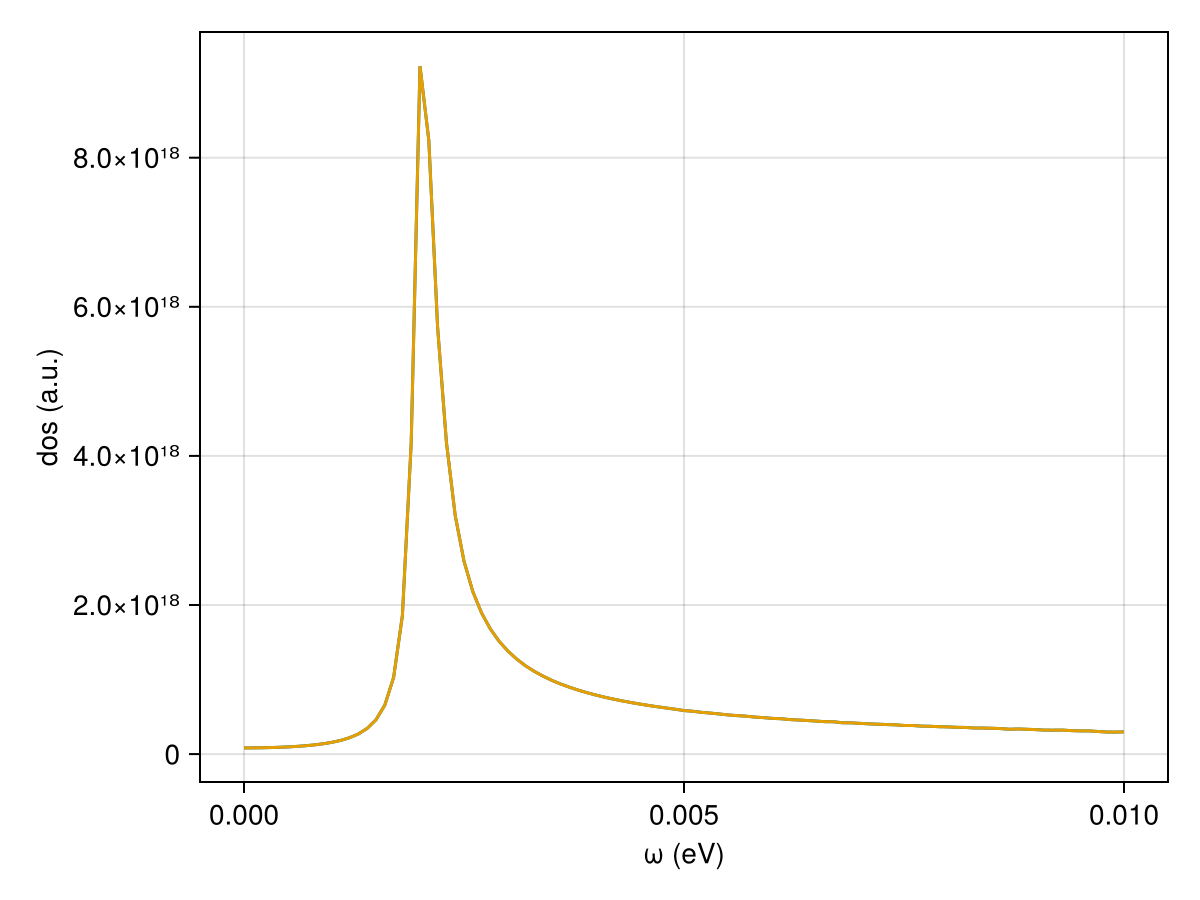

In [117]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "ω (eV)", ylabel = "dos (a.u.)")
lines!(ax, ω, j)
lines!(ax, ω, j2)
fig

### LMC

In [82]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = false, 
     fermi_surface = false, with_shift = false)

lmcnoshift_presets (generic function with 1 method)

In [ ]:
lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(μ, -1, evals))
     for μ in μlist];

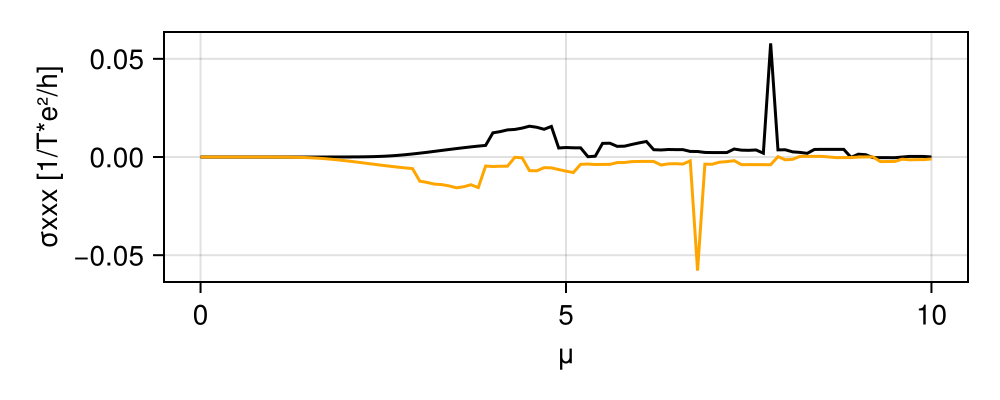

In [11]:
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
lines!(ax, μlist, -lmcnv, color = :orange)
fig

### LMC shift correction.

In [ ]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = false, 
     fermi_surface = false, with_shift = true)
lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
# lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(μ, -1, evals))
#      for μ in μlist];

In [6]:
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
# lines!(ax, μlist, -lmcnv, color = :orange)
fig

UndefVarError: UndefVarError: `lmcpv` not defined

### Drude conductivtiy

In [84]:
xx_drude_presets(μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)

xx_drude_presets (generic function with 5 methods)

In [60]:
drudepv = [drude_conductivity(xx_drude_presets(μ,1)) for μ in μlist];
drudenv = [drude_conductivity(xx_drude_presets(μ,-1)) for μ in μlist];

### LMC/Drude

In [286]:
evals = 80000
μlist = collect(0:.1:15)
T = 5
N = 3
xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, 1, evals))
     for μ in μlist];
# lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, -1, evals))
#      for μ in μlist];
drudepv = [drude_conductivity(xx_drude_presets(N, μ, 1, evals)) for μ in μlist];
# drudenv = [drude_conductivity(xx_drude_presets(N, μ, -1, evals)) for μ in μlist];

151-element Vector{Float64}:
 -0.005818279437086212
 -0.004873642505392094
 -0.004183774929494307
 -0.003714405360492756
 -0.0034419584300947105
 -0.0033526535867244903
 -0.0034419584300936007
 -0.0037144053604913152
 -0.0041837749294931946
 -0.004873642505389402
  ⋮
 -7.820507086885621
 -7.8779892705523835
 -7.934997305639992
 -7.991765690574715
 -8.048103515747364
 -8.104132798726344
 -8.159796715544353
 -8.215146019334806
 -8.270162672188317

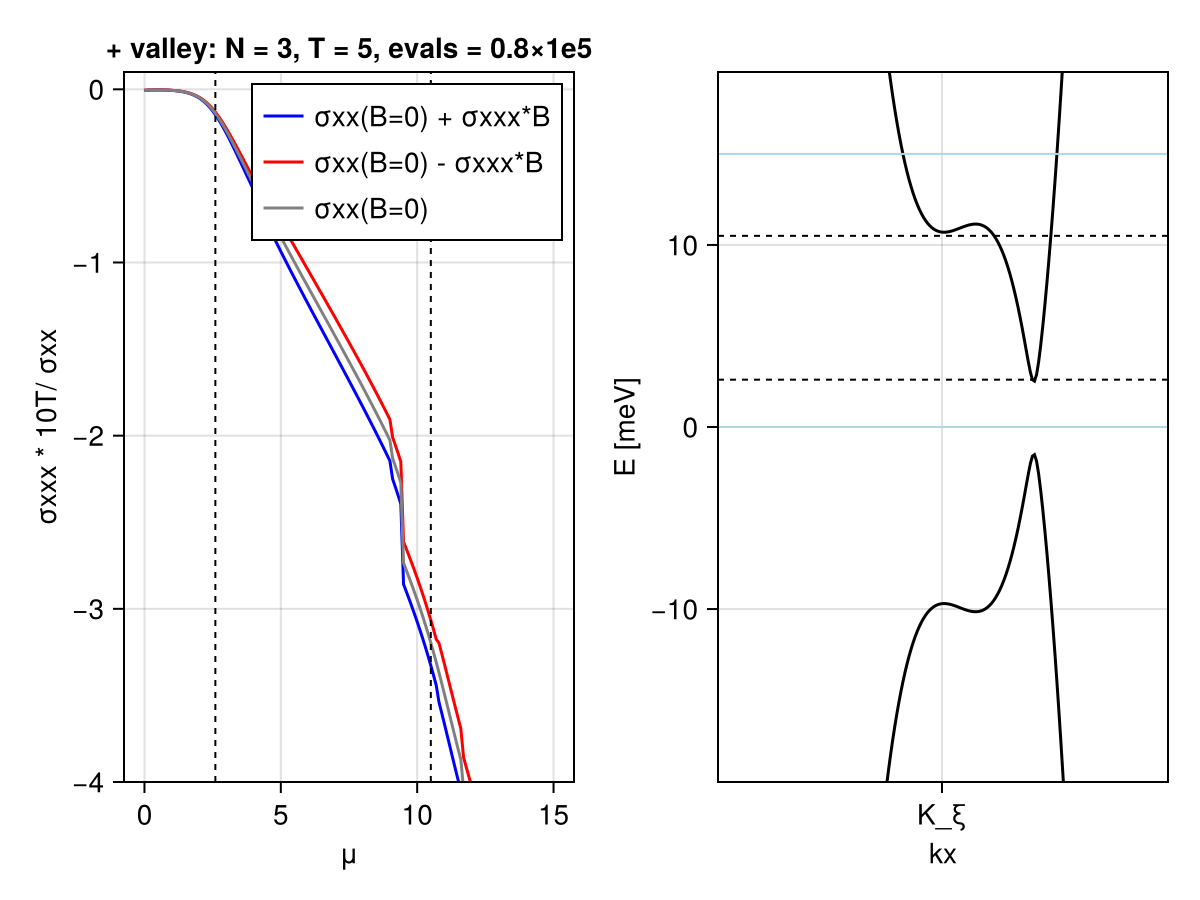

In [289]:
# single valley
B = 10
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx * $(B)T", title = "+ valley: N = $(N), T = $(T), evals = $(evals/1e5)×1e5")
lines!(ax, μlist, (lmcpv) .*B + (drudepv), label = "σxx(B=0) + σxxx*B", color = :blue)
lines!(ax, μlist, -(lmcpv) .*B + (drudepv), label = "σxx(B=0) - σxxx*B", color = :red)
lines!(ax, μlist,(drudepv), label = "σxx(B=0)", color = :gray)
axislegend(ax, position = :rt)
ylims!(ax, [-4,0.1])
ax2 = Axis(fig[1, 2]; xlabel = "kx", ylabel = "E [meV]")
abcNplotbandsk(ax2, N, 100, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
vlines!(ax, 2.6, linestyle = :dash, linewidth = 1, color = :black )
hlines!(ax2, 2.6, linestyle = :dash, linewidth = 1, color = :black )


hlines!(ax2, μlist[1], linestyle = :solid, linewidth = 1, color = :lightblue)
hlines!(ax2, μlist[end], linestyle = :solid, linewidth = 1, color = :lightblue )
hlines!(ax2,  10.5, linestyle = :dash, linewidth = 1, color = :black )
vlines!(ax, 10.5, linestyle = :dash, linewidth = 1, color = :black )


fig
# lines!(ax, μlist, lmcpv .*B ./ drudepv, color = :gray)
# lines!(ax, μlist, lmcnv .*B ./  drudenv, color = :orange)
# scatter!(ax, μlist, (lmcpv+ lmcnv) .*B ./ (drudepv +drudenv))

#### LMC/Drude vs temperature

In [229]:
evals = 200000
μ = 5
Tlist = collect(1:2:10)

xx_drude_presets(N, μ,ξ, evals, T) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)
lmcnoshift_presets(N, μ, ξ, evals, T) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, 1, evals, T))
     for T in Tlist];
# lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, -1, evals, T))
    #  for T in Tlist];
drudepv = [drude_conductivity(xx_drude_presets(N, μ, 1, evals, T)) for T in Tlist];
# drudenv = [drude_conductivity(xx_drude_presets(N, μ, -1, evals, T)) for T in Tlist];

5-element Vector{Float64}:
 -3.534897775478475
 -3.62418914430746
 -3.580552921396425
 -3.5413796221517213
 -3.516549300230137

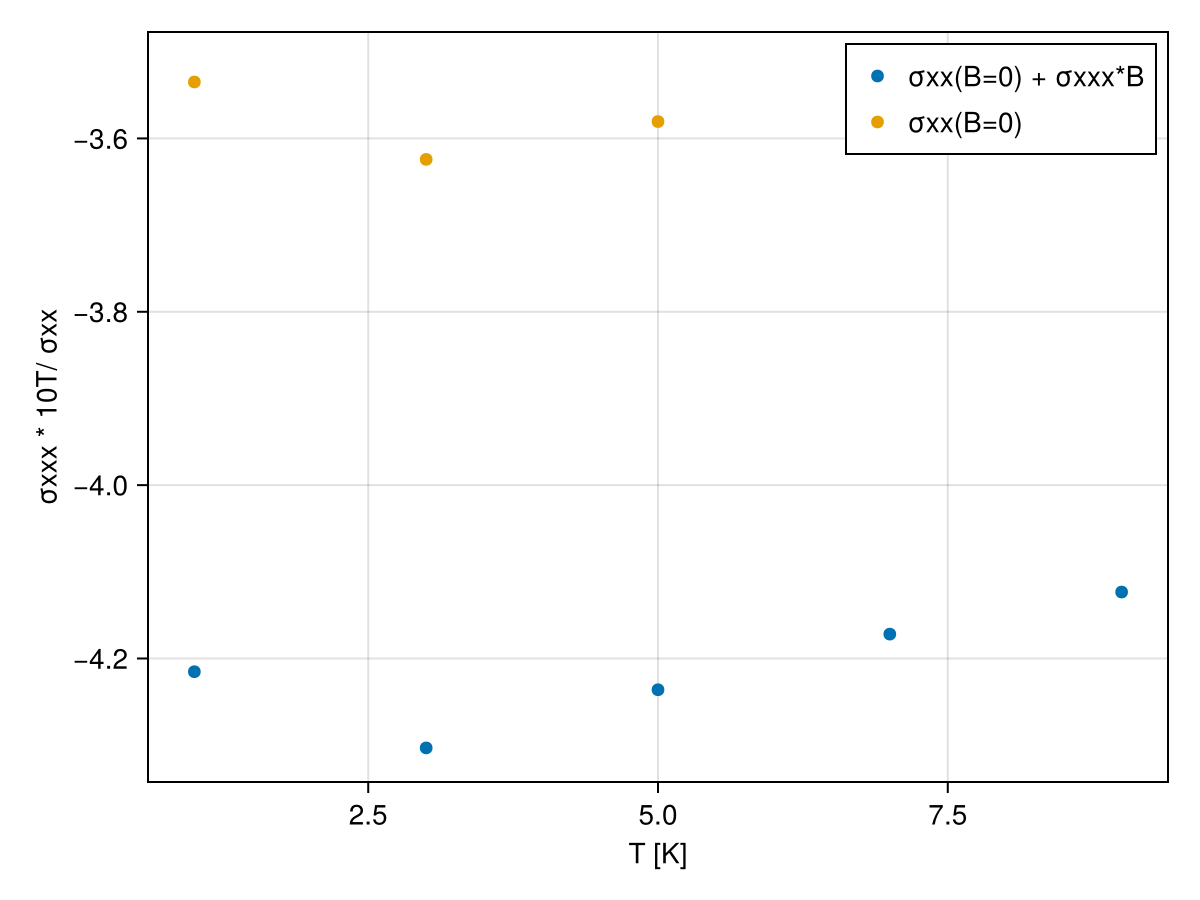

In [230]:
B = 10
fig = Figure()
ax = Axis(fig[1,1], xlabel = "T [K]", ylabel = "σxxx * $(B)T/ σxx")
# lines!(ax, μlist, lmcpv .*B ./ drudepv, color = :gray)
# lines!(ax, μlist, lmcnv .*B ./  drudenv, color = :orange)
# scatter!(ax, μlist, (lmcpv+ lmcnv) .*B ./ (drudepv +drudenv))
scatter!(ax, Tlist, (lmcpv) .*B .+ (drudepv ), label = "σxx(B=0) + σxxx*B")
scatter!(ax, Tlist, (drudepv), label = "σxx(B=0) ")

# lines!(ax, Tlist, (lmcpv+ lmcnv) .*B .+ (drudepv +drudenv), label = "σxx(B=0) + σxxx*B")
# lines!(ax, Tlist, (drudepv +drudenv), label = "σxx(B=0) ")

# lines!(ax, Tlist,(drudepv +drudenv), color = :gray, label = "σxx(B=0)")
axislegend(ax)#, position = (1,1))
# ylims!(ax, [-0.2,0.2])
fig

#### LMC/Drude vs number of layers

### Anomalous Hall Effect

In [ ]:
# each valley contributes with N/2 e^2/h

In [88]:

μ = 0
ξ = -1
T = 0.5
N = 7
evals = 1000
μlist = collect(-10:0.2:10)

ahe_p(μ, ξ) = σxyahe_presets(N, μ, ξ, p, evals = evals, T = T)
ahe_pos = [σij_anomalous_hall(ahe_p(μ, 1)) for μ in μlist];
ahe_neg = [σij_anomalous_hall(ahe_p(μ, -1)) for μ in μlist];


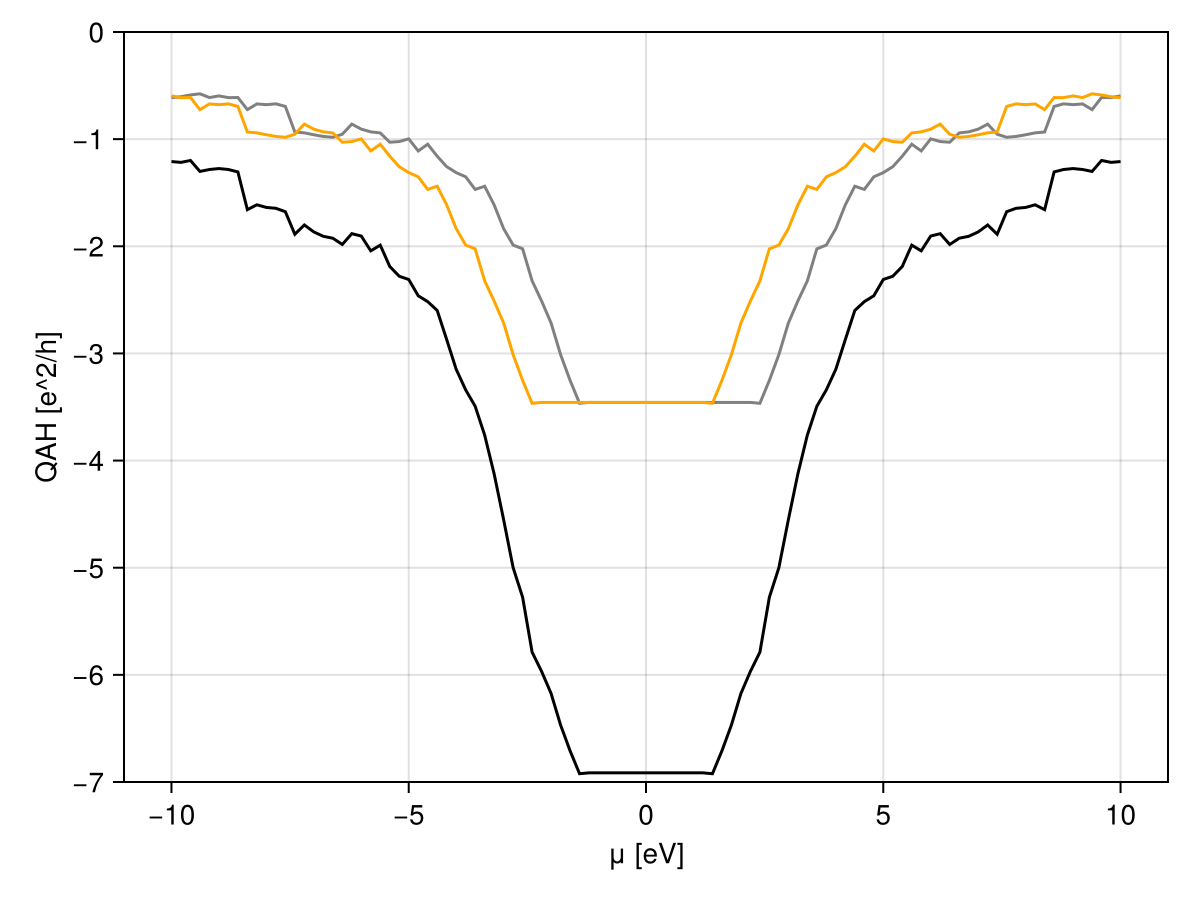

In [89]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ [eV]", ylabel = "QAH [e^2/h]")
lines!(ax, μlist, ahe_pos, color =:gray)
lines!(ax, μlist, ahe_neg, color =:orange)
lines!(ax, μlist, ahe_pos+ahe_neg, color =:black)
ylims!(-N,0)
fig 

#### QAH in a Spinfull valleyfull model

In [176]:
"""given a gap size and valley asymmetry params it returns a set of parameters for the computation of a given observable assuming a half metal.
Valley asymmetry is not really required I think but I leave it just in case"""
function half_metal_presets(p, Delta_Ez, Valley_asym = 0)
    pvsu = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    pvsd = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    nvsu = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsd = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    return [pvsu, pvsd, nvsu, nvsd]
end

"""given a gap size and valley asymmetry params it returns a set of parameters for the computation of a given observable assuming a quarter metal."""
function quarter_metal_presets(p, Delta_Ez, Valley_asym = 0)
    pvsu = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    pvsd = Params_rhombohedral(p, ξ = 1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsu = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsd = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    return [pvsu, pvsd, nvsu, nvsd]
end

function half_metal_plotbands(p::Params_rhombohedral, N, Delta_Ez, Valley_asym = 0; points = 100)
    ps = half_metal_presets(p, Delta_Ez, Valley_asym)
    return spinfull_plotbands(N, ps, points = points)
end

function quarter_metal_plotbands(p::Params_rhombohedral, N, Delta_Ez, Valley_asym = 0; points = 100)
    ps = quarter_metal_presets(p, Delta_Ez, Valley_asym)
    return spinfull_plotbands(N, ps, points = points)
end

function spinfull_plotbands(N, ps; points = 100)
    fig = Figure()
    ax = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]")
    spinfull_plotbands!(ax, N, ps, points = points)
    return fig
end

function spinfull_plotbands!(ax, N, ps; points = 100)
    abcNplotbandsk(ax, N, points, ps[1]; ylims = [-1, 1], color = :black)#, style = :solid)
    abcNplotbandsk(ax, N, points, ps[2]; ylims = [-1, 1], color = :black)#, style = :dash)
    abcNplotbandsk(ax, N, points, ps[3]; ylims = [-1, 1], color = :gray)#, style = :solid)
    abcNplotbandsk(ax, N, points, ps[4]; ylims = [-1, 1], color = :gray)#, style = :dash)
end

function half_metal_dos(N, p, Delta_Ez, Valley_asym, μlist; evals = 100, η = 0.05)
    ps = half_metal_presets(p, Delta_Ez, Valley_asym)
    ω, js = spinfull_dos(N, ps, η, evals)
    fig = Figure()
    ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "DOS (a.u.)")
    plot_dos!(ax, ω, js)
    fig
end


function quarter_metal_dos(N, p, Delta_Ez, Valley_asym, μlist; evals = 100, η = 0.05)
    ps = quarter_metal_presets(p, Delta_Ez, Valley_asym)
    ω, js = spinfull_dos(N, ps, η, evals)
    fig = Figure()
    ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "DOS (a.u.)")
    plot_dos!(ax, ω, js)
    fig
end

function spinfull_dos(N, ps, η, evals)
    nps = [xxx_lmc_presets(N, ps[i]) for i in 1:length(ps)]
    ω, j1 = c_dos(nps[1], μlist, η = η, evals = evals)
    ω, j2 = c_dos(nps[2], μlist, η = η, evals = evals)
    ω, j3 = c_dos(nps[3], μlist, η = η, evals = evals)
    ω, j4 = c_dos(nps[4], μlist, η = η, evals = evals)
    return ω, [j1,j2,j3,j4]
end

function plot_dos!(ax, ω, js)
    colors = [:black, :black, :gray, :gray]
    styles = [:solid, :dash, :solid, :dash]
    labels = ["+↑", "+↓", "-↑", "-↓"]
    for (i,j) in enumerate(js)
        lines!(ax, ω, j, color = colors[i], linestyle = styles[i], label = labels[i])
    end
    axislegend(ax)
end


plot_dos! (generic function with 1 method)

Bands

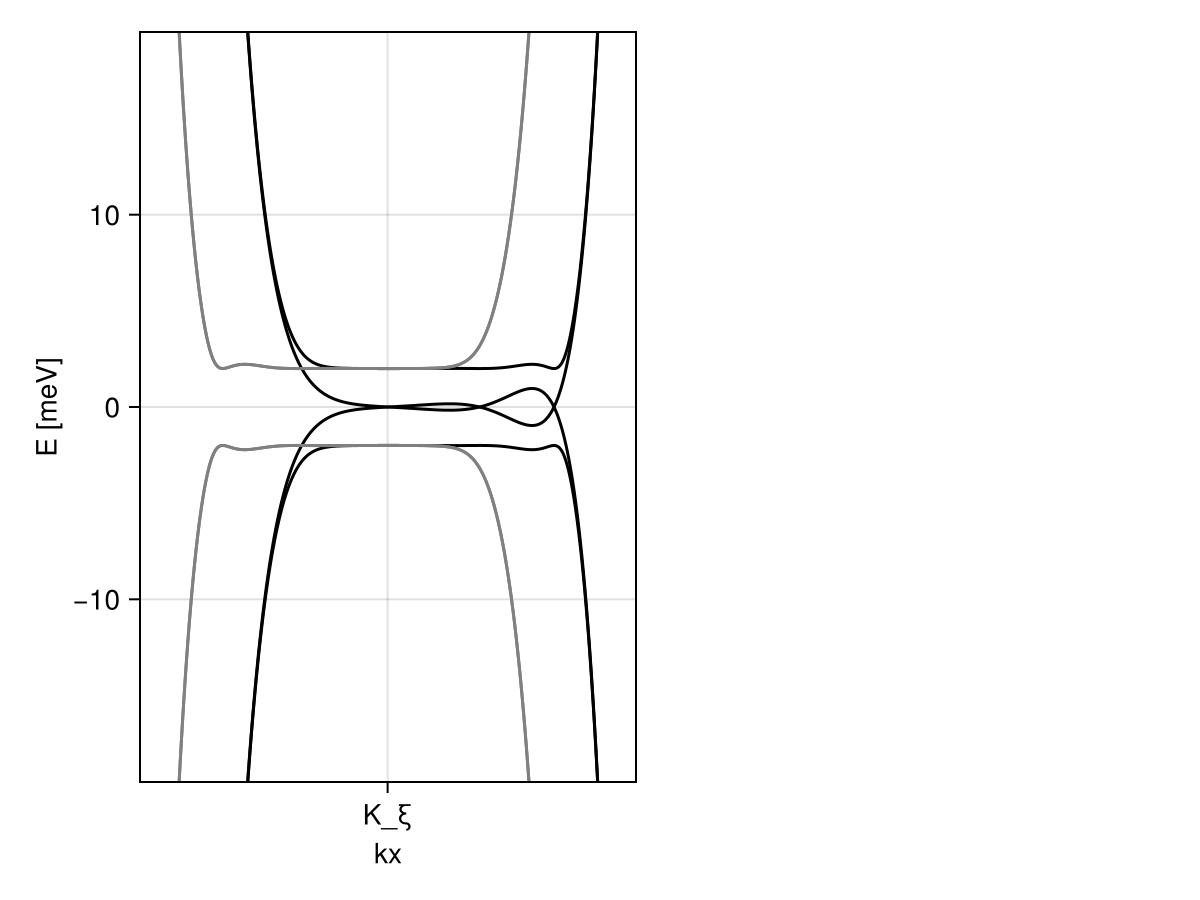

In [173]:
quarter_metal_plotbands(p, N, p.Delta_Ez, 0, points = 300)

DOS

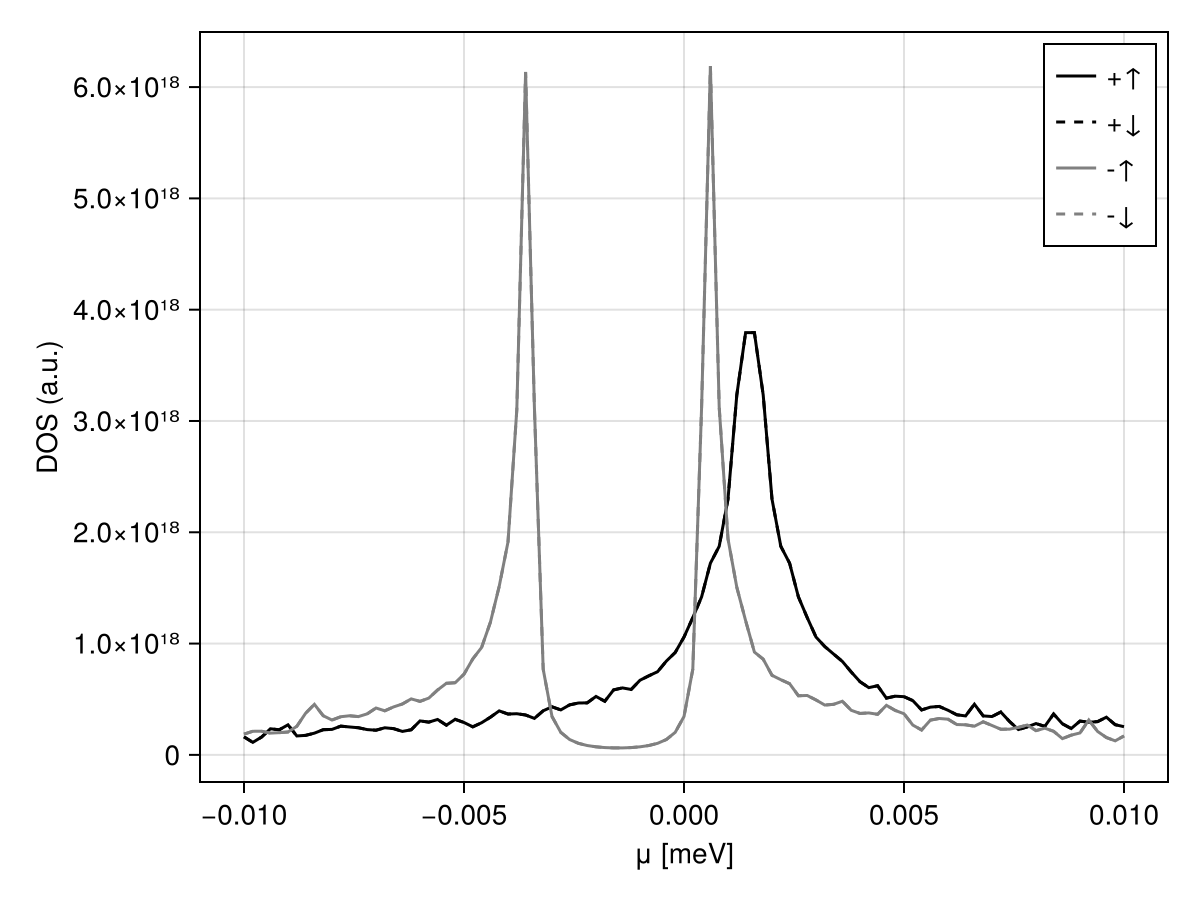

In [177]:
half_metal_dos(N, p, p.Delta_Ez, 3, μlist, η = 0.1 ,evals = 1e4)

#### Filling


In [25]:
μlist = collect(-5:.1:5)
fills = [rh_filling(N, p, μ, T = T, evals = evals) for μ in μlist];

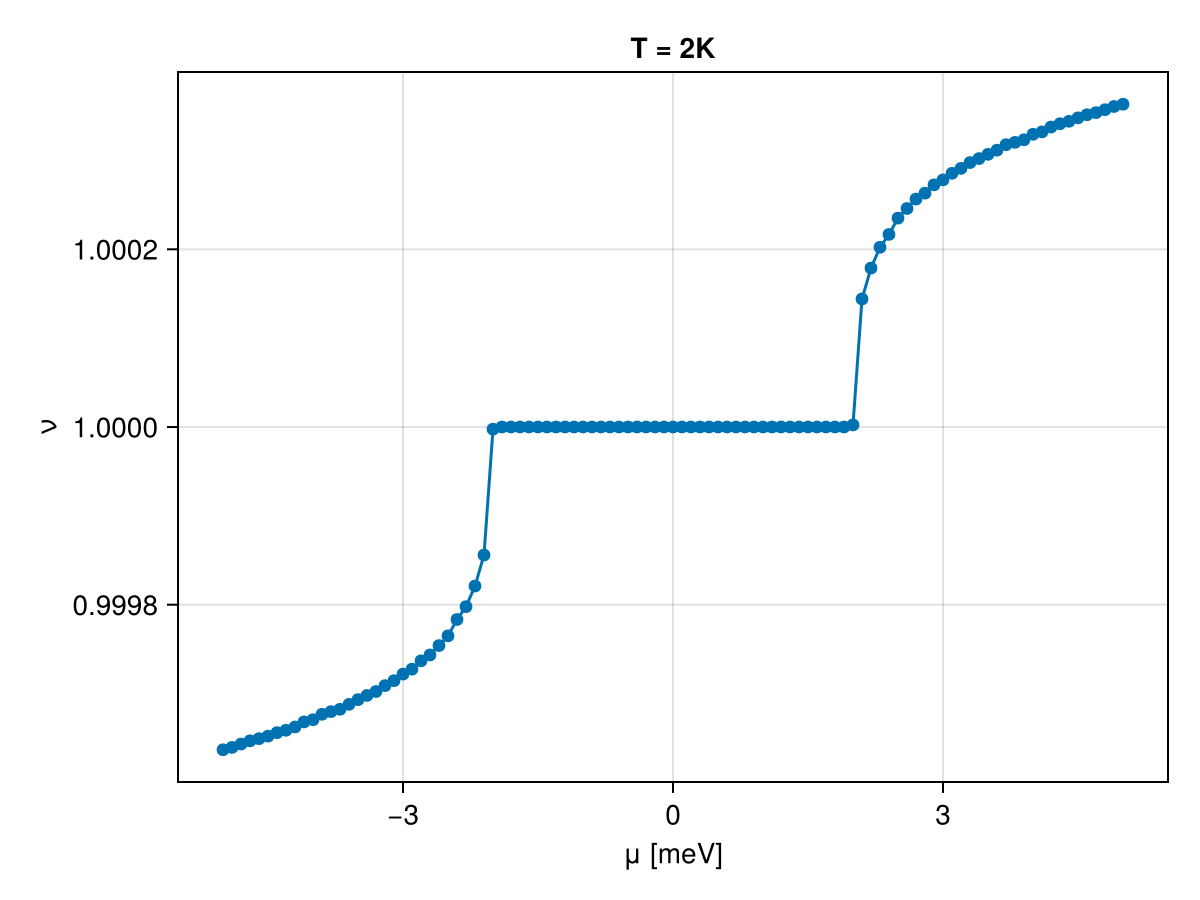

In [29]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "ν", title = "T = $(T)K")
scatter!(ax, μlist, fills)
lines!(ax, μlist, fills)
fig

## k-resolved observables

### K-resolved plots: General panel

In [ ]:
# p = lmcnoshift_presets(μ,ξ, Ω_contr = true, omm_contr = true, fermi_surface = false, with_shift = true)
# kxs, kys, Zs = kresolvedlmc(p; points = 300, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)
# plotmap(kxs,kys, Zs, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)

In [158]:
include(rhomb_folder * "wrapper_lmc.jl")
include(common_folder * "separate_contributions.jl")

function lmc_fig_contribution(μ, ξ, pR::Params_rhombohedral; N= 3, points = 100, T = 1)
    pΩandomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
    pΩ_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = false, fermi_surface = false, with_shift = false)
    pomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = false, omm_contribution = true, fermi_surface = false, with_shift = false)

    fig = Figure(size=(2*600,600))
    ax1 = Axis(fig[1, 1], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω and OMM. T = $(T)K")
    ax2 = Axis(fig[1, 2], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω. T = $(T)K")
    ax3 = Axis(fig[1, 3], xlabel = "kx", ylabel = "ky", title = "Contributions: OMM. T = $(T)K")
    kres(p) = kresolvedlmc(pR, p; points = points, Ω_contr = p.berry_contribution, omm_contr = p.omm_contribution, fermi_surface = p.fermi_surface, with_shift = p.with_shift)
    
    # components of the lmc
    kxs, kys, Z1s = kres(pΩandomm_contr)
    kxs, kys, Z2s = kres(pΩ_contr)
    kxs, kys, Z3s = kres(pomm_contr)

    # compute in-plane berry
    kxs, kys, Z5s = kresolved_Ωin(pR, pΩandomm_contr, points = points) 
    kxs, kys, Z6s = kresolved_dOMM(pR, pΩandomm_contr, points = points)
    kxs, kys, Z7s = kresolved_Ωz(pR, pΩandomm_contr, points = points)

    m2toang2 = 1e20
    prefactor = 1e6
    Z1s .*= m2toang2
    Z2s .*= m2toang2
    Z3s .*= m2toang2
    Z5s .*= m2toang2 / prefactor
    Z7s .*= m2toang2

    m = minimum([minimum(Z) for Z in [Z1s, Z2s, Z3s]])
    M = maximum([maximum(abs.(Z)) for Z in [Z1s, Z2s, Z3s]])

    println( maximum(Z7s) )
    colrange = [-1,1] .* 3e4 #[m, M]
    colrange2 = [-1,1] .* 2
    colrange3 = [-1,1] ./ 1e11

    colmap =  cgrad([:red, :black, :lightblue])
    colmap2 = cgrad([:red, :white, :lightblue])


    plotmap!(ax1, kxs, kys, Z1s, colrange = colrange, colmap = colmap)
    plotmap!(ax2, kxs, kys, Z2s, colrange = colrange, colmap = colmap)
    hm = plotmap!(ax3, kxs, kys, Z3s, colrange = colrange, colmap = colmap)

    
    ax4 = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]")
    abcNplotbandsk(ax4, N, points, pR; ylims = [-1, 1], color = :black)
    hlines!(ax4, μ) 
    ax5 = Axis(fig[2, 2], xlabel = "kx", ylabel = "ky", title = "Ωx")
    hm2 = plotmap!(ax5, kxs, kys, Z5s, colrange = colrange2, colmap = colmap2)
    ax6 = Axis(fig[2,3], xlabel = "kx", ylabel = "ky", title = "d_OMMxx")
    hm3 = plotmap!(ax6, kxs, kys, Z6s,colrange = colrange2, colmap = colmap2)
    ax7 = Axis(fig[2, 1], xlabel = "kx", ylabel = "ky", title = "Ωz") 
    plotmap!(ax7, kxs, kys, Z7s, colrange = colrange3, colmap = colmap2)
    
    # # cb = Colorbar(fig[3, 2], hm2)
    Colorbar(fig[1,4], hm, label = "LMC integrand")
    Colorbar(fig[3,2], hm2, vertical = false,  flipaxis = false , label = "Å^2/eV [x$(prefactor)]")
    Colorbar(fig[3,3], hm3, vertical = false,  flipaxis =false, label = "m^3/(eV*s)")
    
    hideydecorations!(ax2)
    hidexdecorations!(ax1)
    hidexdecorations!(ax2)
    hidexdecorations!(ax3)
    hideydecorations!(ax3)
    hideydecorations!(ax5)
    hideydecorations!(ax6)

    return fig
end

lmc_fig_contribution (generic function with 1 method)

0.012169856126048028


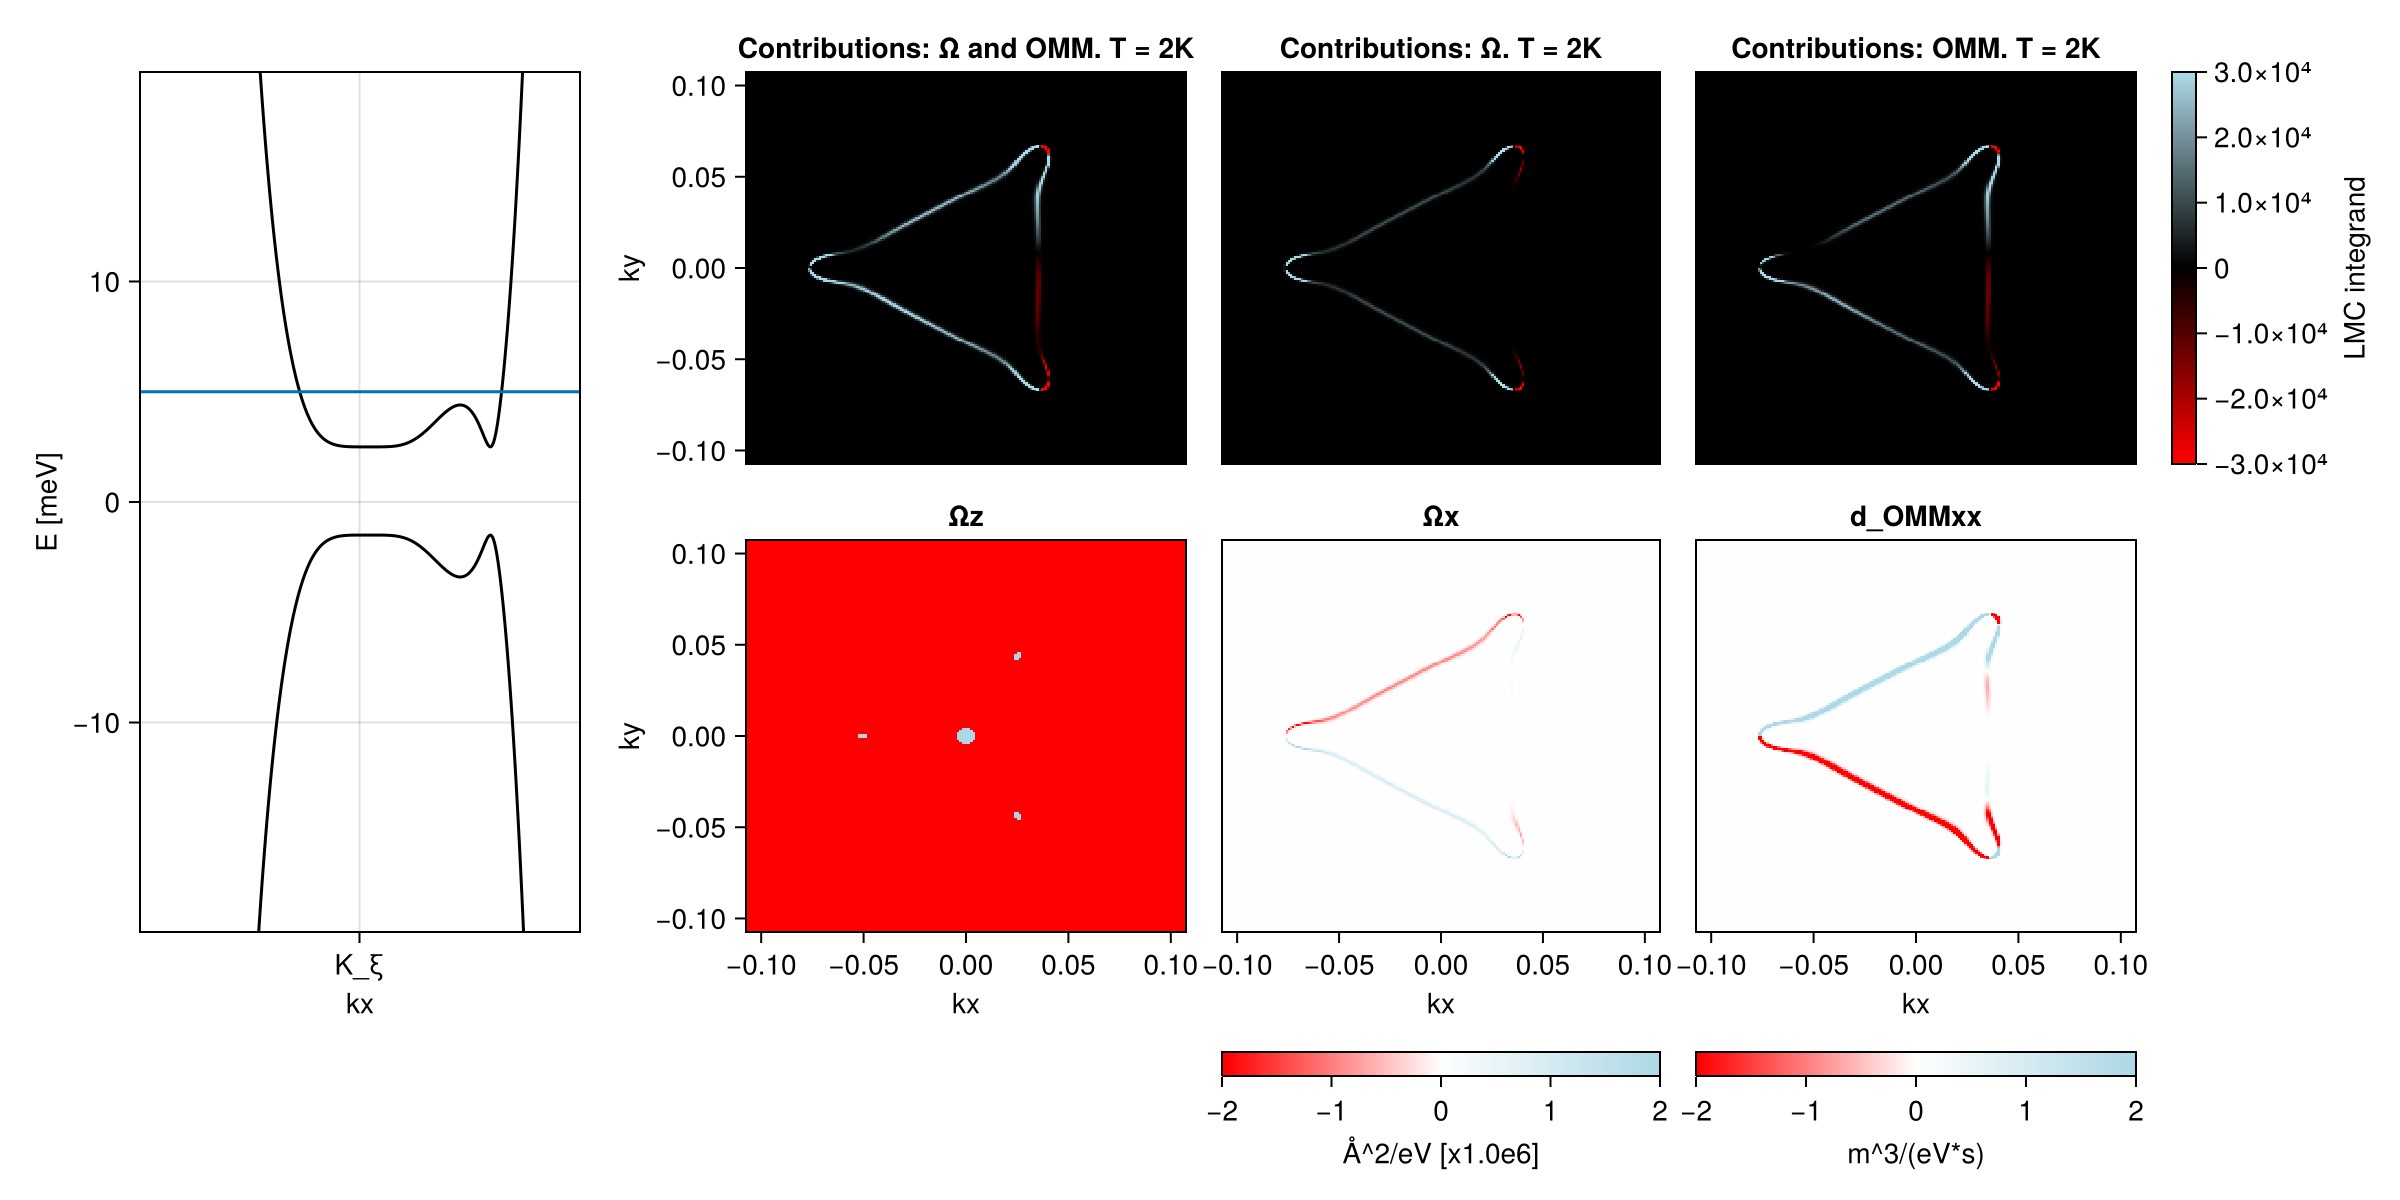

In [159]:
lmc_fig_contribution(5, -1, p, N = 5, points = 200, T = 2)

### \Omega Z calculations 

In [80]:
function kΩz(fig::Figure, N, ξ, pR, μlist = [0, 2, 4, 6]; col = 1, T = 5, points = 100, colrange = [-1,1])
    colmap = cgrad([:red, :white, :lightblue])
    count = 1
    prefactor = maximum(colrange)
    colrange2 = colrange / prefactor
            
    c1 = RGBf(0.30, 0.65, 1.00)
    c2 = RGBf(0.10, 0.85, 0.55)
    c3 = RGBf(1.00, 0.75, 0.20)

    clist = [c1,c2,c3]

    for μ in μlist[1:end]
        pS = xxx_lmc_presets(N, μ, ξ, pR; T = T)
        kxs, kys, Z1s = kresolved_Ωz(pR, pS, points = points)
        Z1s .*= 1e20/ prefactor
        count += 1
        ax = Axis(fig[col,count], xlabel = "kx", ylabel = "ky")
        hmm = plotmap!(ax, kxs, kys, Z1s, colrange = colrange2, colmap = colmap)
        # text!(ax, "μ = $(μ) [meV]", position =  (0., 0.085), align = (:center, :top))
        if count == length(μlist) + 1
            Colorbar(fig[1,count + 1], hmm, label = "Ωz [×10^$(Int(log10(prefactor))) Å^2] ")
        else nothing end
        if count ≠ 2
            hideydecorations!(ax)
        else nothing end
        if col == 1 || col == 2 
            hidexdecorations!(ax)
        else nothing end
        xlims!(ax, -0.099,0.099)
        ylims!(ax, -0.099,0.099)
        e1 = MarkerElement(color=clist[count-1],  marker=:rect, markersize=18)
        
        axislegend(ax, [e1], [""], framevisible = false, position = (1.1,1.05))
    end
    axlast = Axis(fig[col,1]; xlabel = "kx", ylabel = "E [meV]")
    abcNplotbandsk(axlast, N, points, pR; ylims = [-1, 1], color = :black)
    [hlines!(axlast, μlist[i], color = clist[i]) for i in 1:length(μlist)]
    text!(axlast, "N = $(N)", position =  (Int(round(18 * points/100, digits = 0)),19), align = (:center, :top))
    if col == 1 || col == 2 
        hidexdecorations!(axlast)
    else nothing end
    
    return fig
end


function kΩz(N, ξ, pR, μlist = [0, 2, 4, 6]; kws...)
    return kΩz(Figure(size = (1000,300)), N, ξ, pR, μlist; kws...)
end

function figureΩzvsN(ξ, pR; Nlist = [3,5,7], μlist = [0, 2, 4, 6], kws...)
    fig = Figure(size = (1000,800))
    count = 1
    for N in Nlist
        kΩz(fig, N, ξ, pR, μlist; col = count, kws...)
        count +=1
    end
    return fig
end


    

figureΩzvsN (generic function with 1 method)

#### Figure for a given N

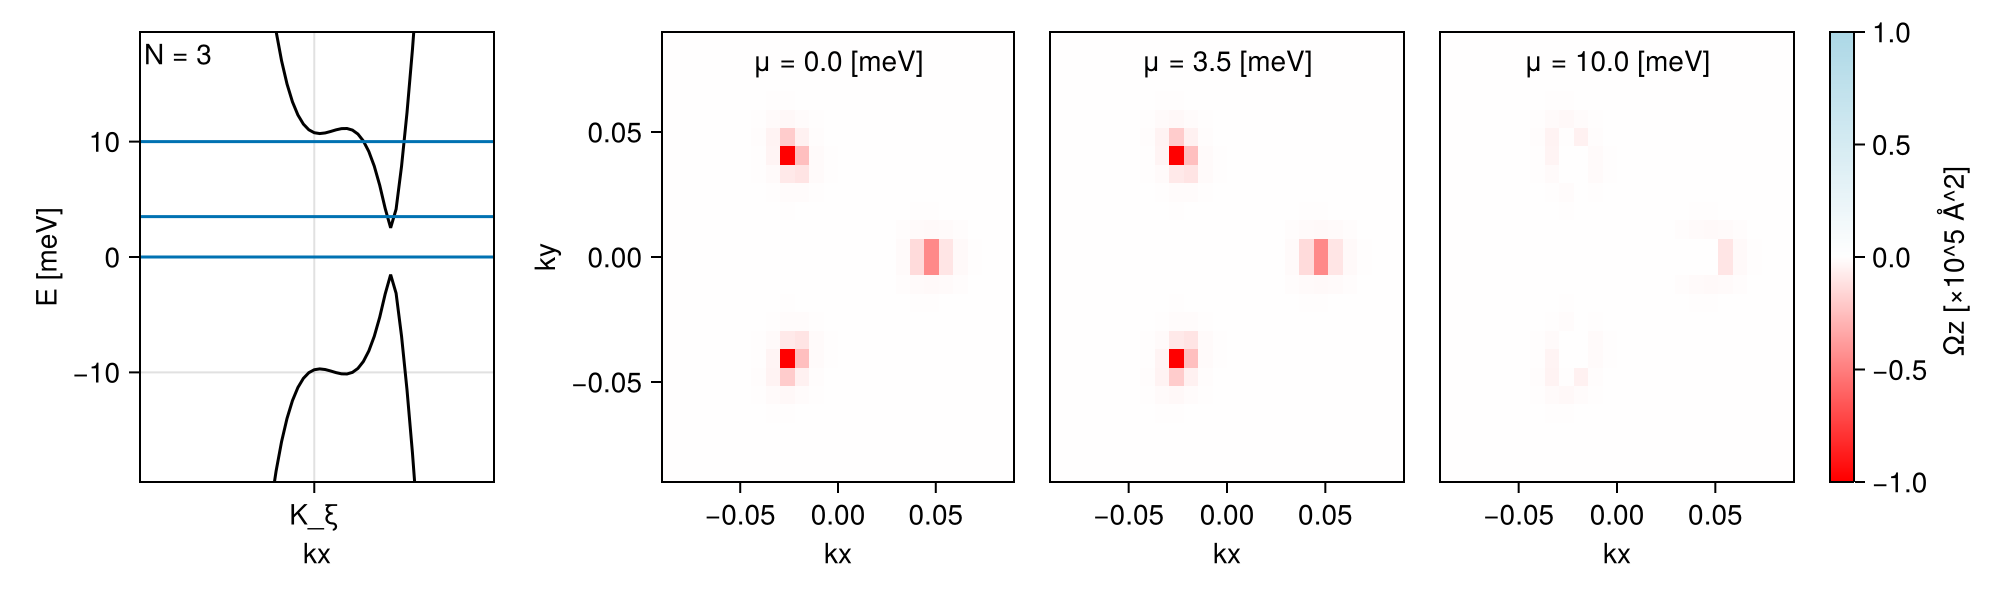

In [33]:
N =  3
kΩz( N, 1, p, [0,3.5,10], col =1, T = 2, points = 30, colrange = [-1,1] .* 1e5)

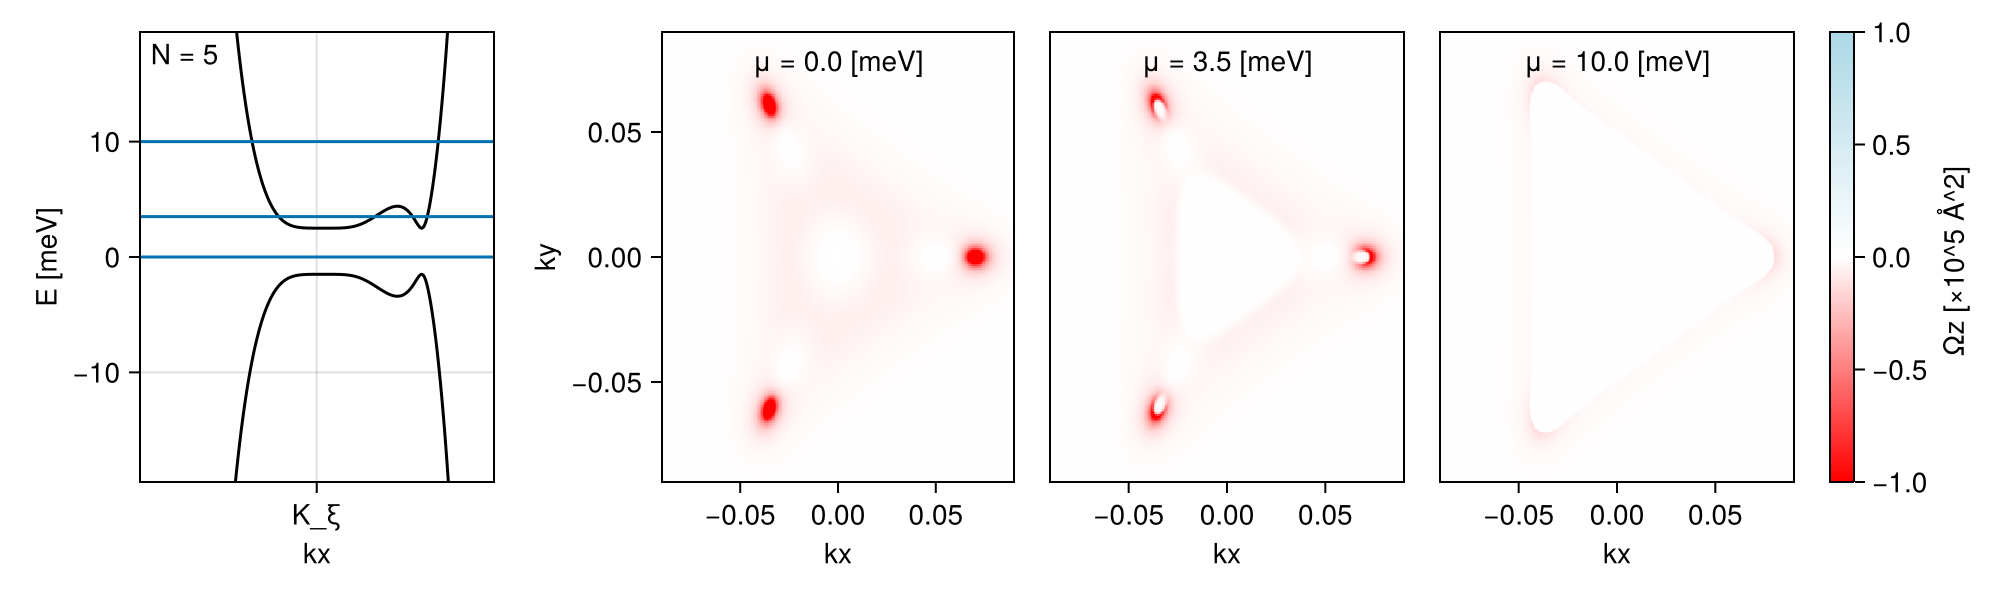

In [34]:
N =  5
kΩz(N, 1, p, [0,3.5,10], T = 2, points = 300, colrange = [-1,1] .* 1e5)

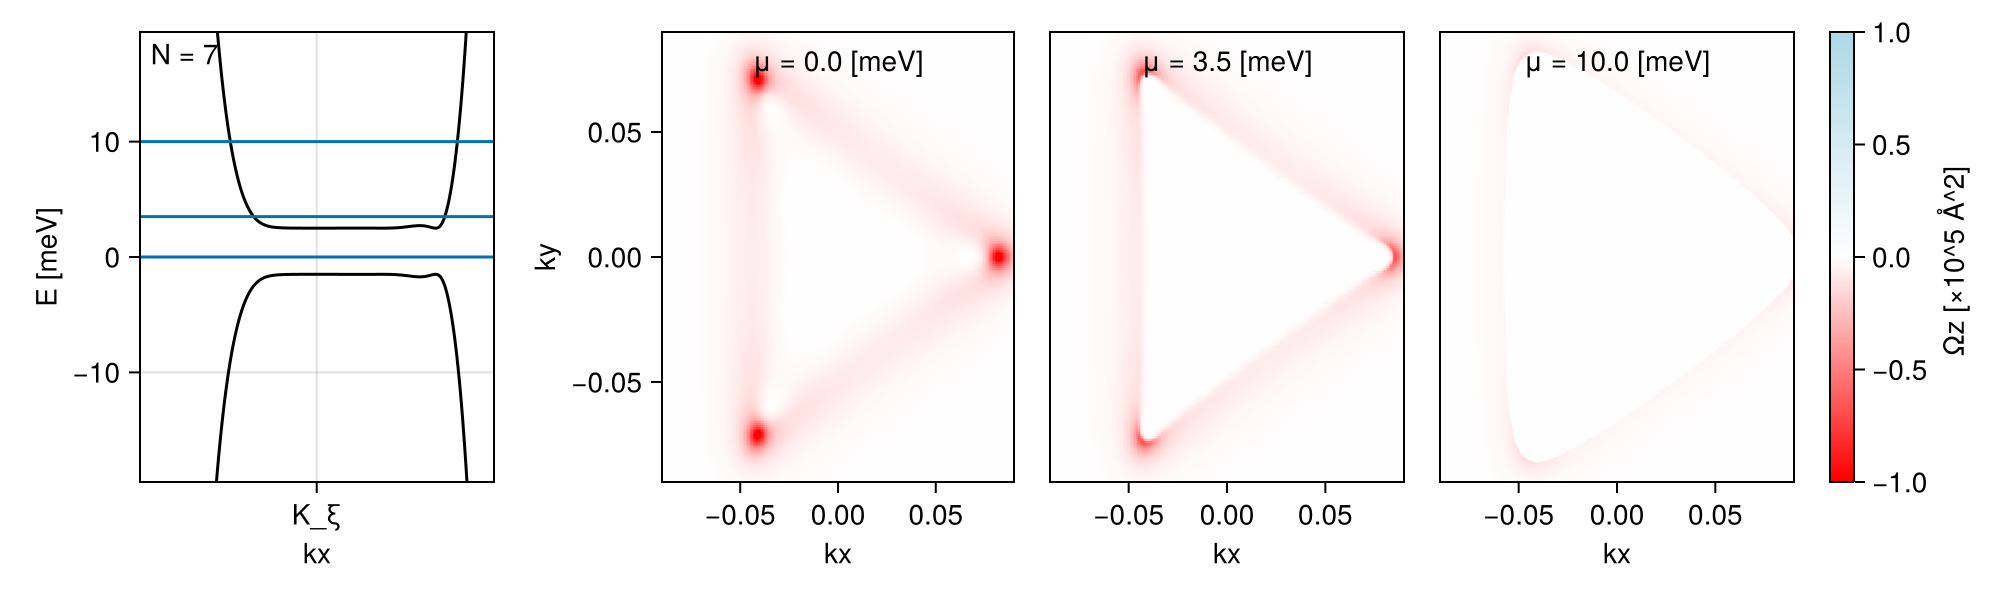

In [23]:
N =  7
kΩz(N, 1, p, [0,3.5,10], T = 2, points = 300, colrange = [-1,1] .* 1e5)

#### Figure vs N

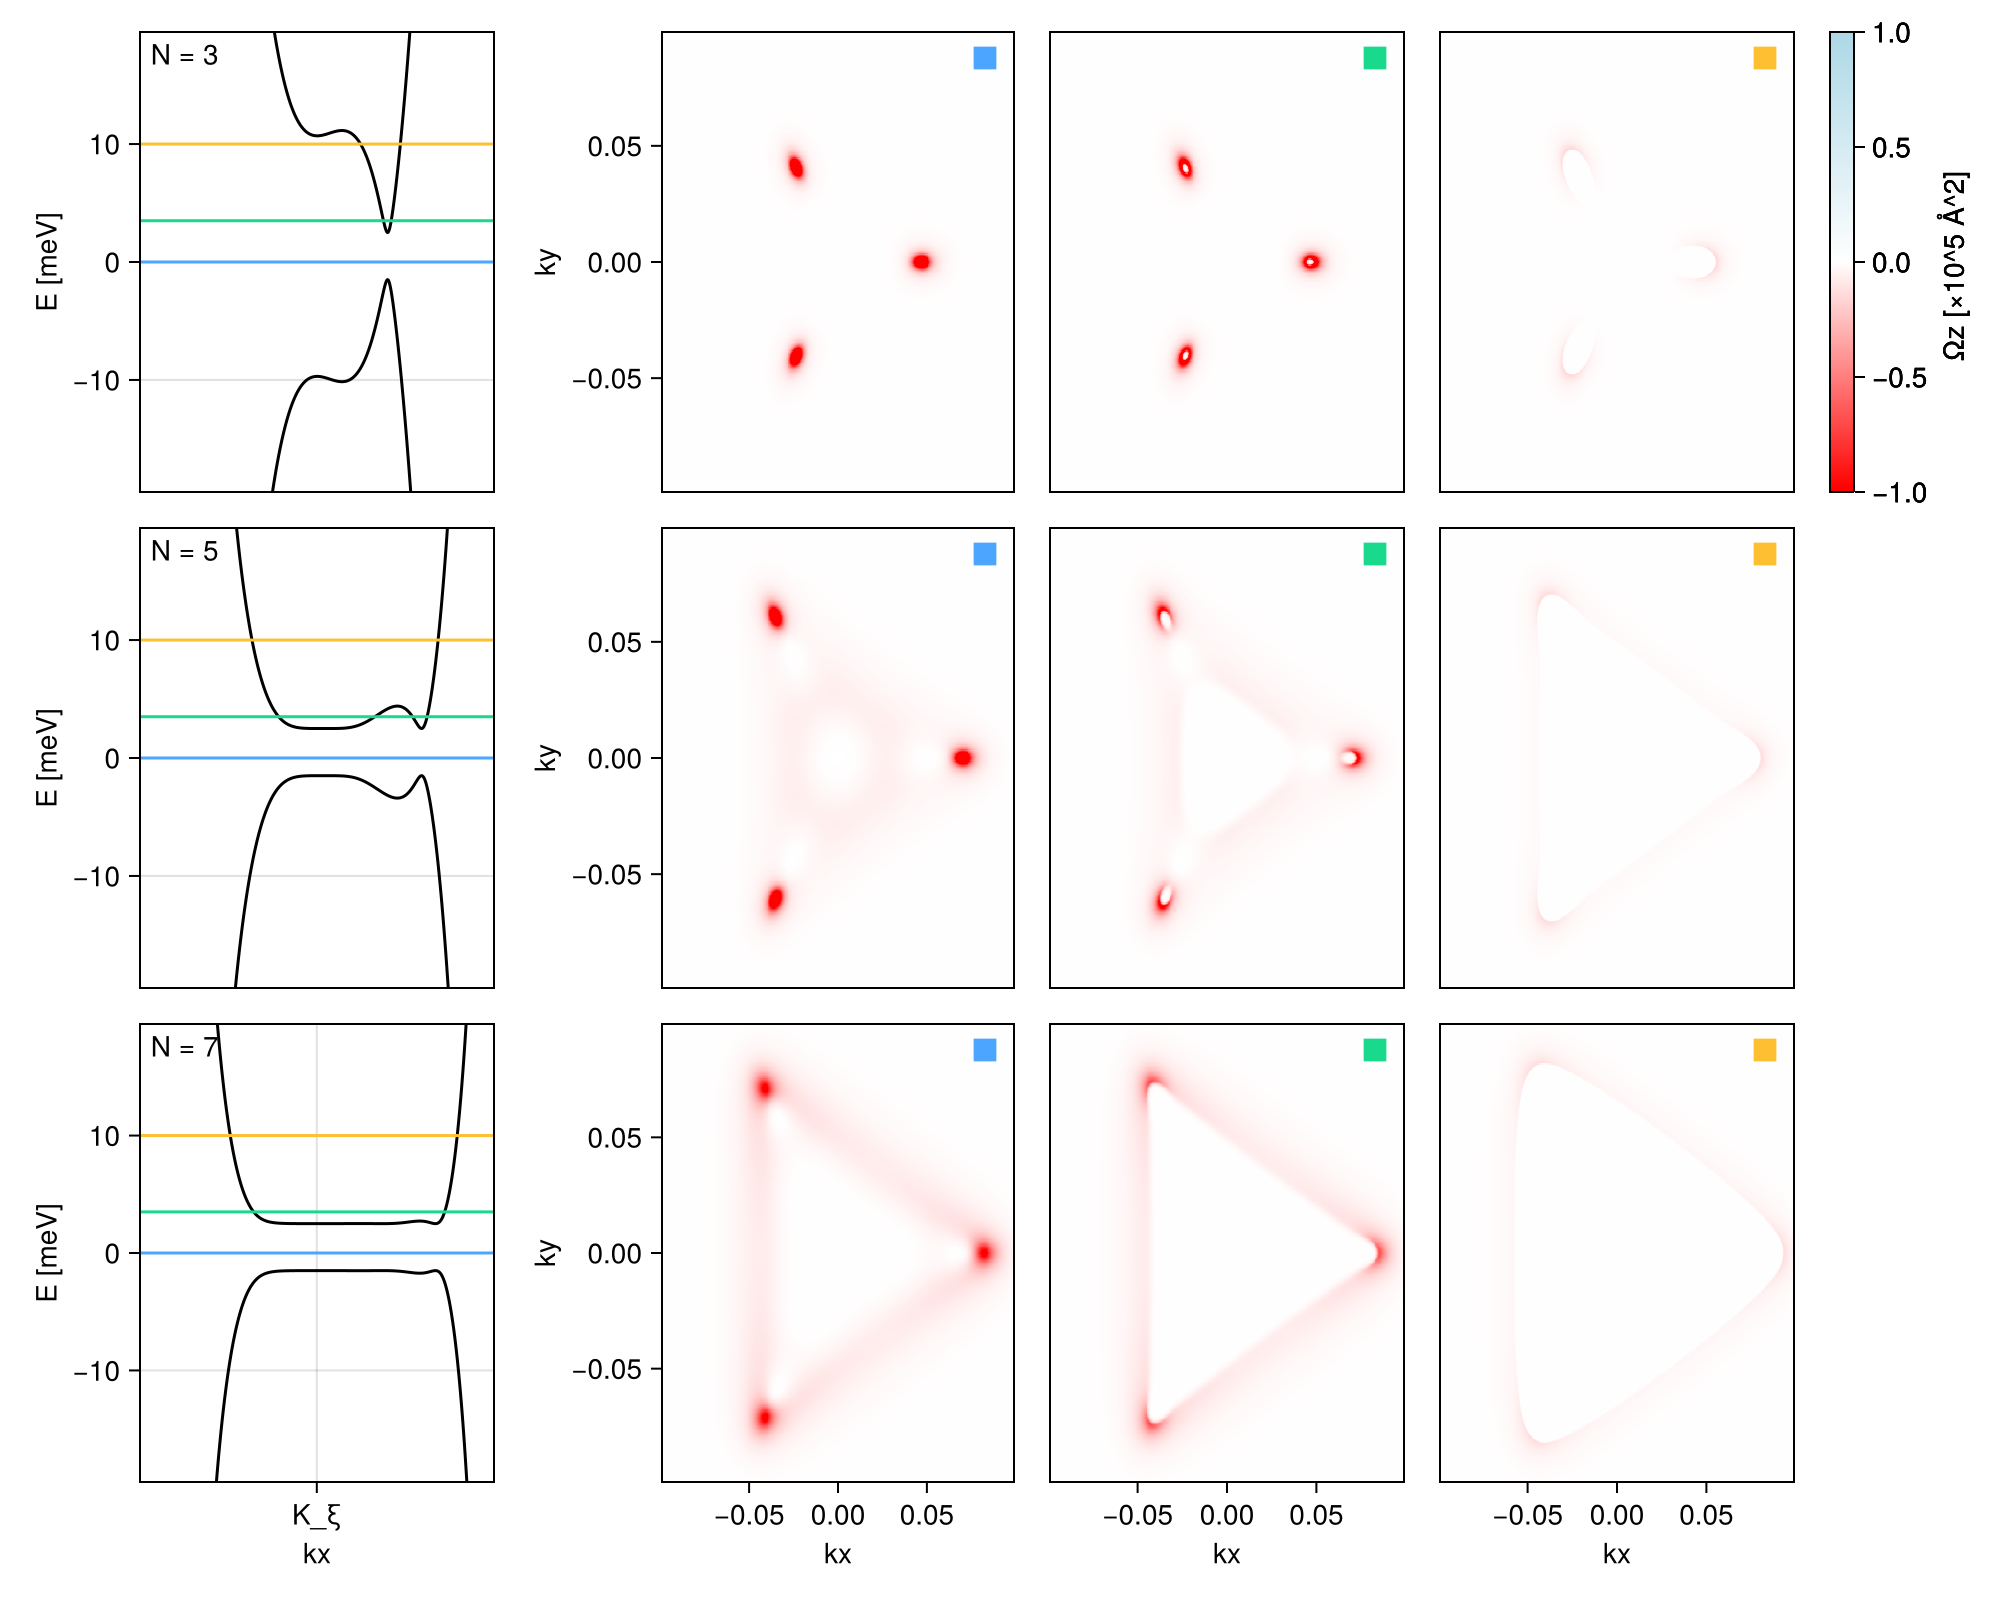

In [81]:
fig = figureΩzvsN(1, p, Nlist = [3,5,7] , μlist = [0,3.5,10], T = 2, points = 400, colrange = [-1,1] .* 1e5)

In [84]:
save(figures_folder * "Omegazkresolved.pdf", fig, px_per_unit = 4)

# px_per_unit = 3

CairoMakie.Screen{PDF}


### LMC contributions resolved

#### Extra

In [ ]:
lmcnoshift0p = lmcnoshift_presets(0,1)
q = [0,0.00000000]
ϵs, ψs = eigen(Matrix(lmcnoshift0p.h(q)))
dhh(q) = lmcnoshift0p.nabla_h(q)
dhx = dhh(q)[1]
dhy = dhh(q)[2]

Optics_in_the_length_gauge.k_linear_mr_integrand(:x,:x,:x, ϵs, ψs, lmcnoshift0p.rz(q, ψs), dh[1], dh[2], lmcnoshift0p.nabla_nabla_h(q), 2, 1;
Ω_contr = true, omm_contr = true, fermi_surface = false)     
using Arpack
    using LinearAlgebra
    using Cubature
    using ProgressMeter
    using Base.Threads
    using Distributed
    using Dierckx
    using PhysicalConstants
    using PhysicalConstants.CODATA2018
    using Unitful
    using SparseArrays
    using StaticArrays
    using Parameters

ang_to_m = 1e-10
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
const ħ = PhysicalConstants.CODATA2018.ħ
const e = PhysicalConstants.CODATA2018.e
const C = ((e^3 / ħ^2) |> u"μA/V^2/s").val
const C_cd = ((e^2/ħ) |> u"μA/V").val
const ħ_ev_s = (ħ |> u"eV*s").val
i = :x;
j = i 
k = j
rz = lmcnoshift0p.rz(q, ψs)

omega = Optics_in_the_length_gauge.Ω(ϵs)
Δx = Optics_in_the_length_gauge.Δ(ψs, dhx) * ang_to_m
Δy = Optics_in_the_length_gauge.Δ(ψs, dhy) * ang_to_m
rx = Optics_in_the_length_gauge.r(ϵs, ψs, dhx) * ang_to_m
ry = Optics_in_the_length_gauge.r(ϵs, ψs, dhy) * ang_to_m
vx = Optics_in_the_length_gauge.vel(ψs, dhx) * ang_to_m/ ħ_ev_s
vy = Optics_in_the_length_gauge.vel(ψs, dhy) * ang_to_m/ ħ_ev_s
vi = Optics_in_the_length_gauge.which_mat(i, vx, vy)
vj = Optics_in_the_length_gauge.which_mat(j, vx, vy)
r_not_k = Optics_in_the_length_gauge.which_mat(k, ry, rx)
Optics_in_the_length_gauge.mr_Ω(:x,:x,:x, rz, rx, ry, vx, vy)